# Домашнее задание №2
## 1. Алгоритм глобального выравнивания с аффинными гэпами.

Тестовые последовательности:


In [1]:
a = "TCCCAGTTATGTCAGGGGACACGAGCATGCAGAGAC"
b = "AATTGCCGCCGTCGTTTTCAGCAGTTATGTCAGATC"

Алгоритм:

In [2]:
import numpy as np 

def affine_gap_alining(a, b, *args, printing=0):
    """Affine gap penalty alining algorithm function.

    a,b - 1st and 2nd strings
    *args - list of scores for match, missmatch and gap
    print - matrises printing flag
    Function prints global alining for a and b
    """
    match_score = args[0]
    missmatch_score = args[1]
    gap_enter = args[2]
    gap_elong = args[3]

    def print_matrix(matrix):
        """Weight matrix printing."""
        print(' ', '-', sep='\t', end='\t')
        for ch in b:
            print(ch, end='\t')
        print()
        for i in range(len(matrix)):
            if i == 0:
                print('-', end='\t')
                for el in matrix[i]:
                    print(el if el < 0 else " " + str(el), end='\t')
                print()
            else:
                print(a[i - 1], end='\t')
                for el in matrix[i]:
                    print(el if el < 0 else " " + str(el), end='\t')
                print()
        return

    def match(a, b, i, j):
        if a[i-1] == b[j-1]:
            return match_score
        else:
            return missmatch_score

    # initialization
    x = len(a) + 1
    y = len(b) + 1
    gap_A = np.zeros((x, y))
    M = np.zeros((x, y))
    gap_B = np.zeros((x, y))

    for i in range(x):
        if i == 1:
            gap_A[i, 0], M[i, 0], gap_B[i, 0] = [gap_enter + gap_elong] * 3
        elif i > 1:
            gap_A[i, 0] = gap_A[i-1, 0] + gap_elong
            gap_B[i, 0] = gap_B[i-1, 0] + gap_elong
            M[i, 0] = M[i-1, 0] + gap_elong

    for j in range(y):
        if j == 1:
            gap_A[0, j], M[0, j], gap_B[0, j] = [gap_enter + gap_elong] * 3
        elif j > 1:
            gap_A[0, j] = gap_A[0, j-1] + gap_elong
            gap_B[0, j] = gap_B[0, j-1] + gap_elong
            M[0, j] = M[0, j-1] + gap_elong
        
    # weight matrises formation

    for i in range(1, len(a) + 1):
        for j in range(1, len(b) + 1):
            gap_A[i, j] = max((gap_enter + gap_elong + M[i, j-1]),
                              (gap_elong + gap_A[i, j-1]))
            gap_B[i, j] = max((gap_enter + gap_elong + M[i-1, j]),
                              (gap_elong + gap_B[i-1, j]))
            M[i, j] = max(match(a, b, i, j) + M[i-1, j-1],
                          gap_A[i, j], gap_B[i, j])

    # matrix printing
    if printing:
        print_matrix(gap_A)
        print()
        print_matrix(M)
        print()
        print_matrix(gap_B)
        print()

    # reverse matrix traversal and alignment making

    i = len(a)
    j = len(b)
    s_a, s_b, s_c = '', '', ''

    while (i > 0) or (j > 0):
        if i > 0 and j > 0 and M[i, j] == M[i-1, j-1] + match(a, b, i, j):
            s_a = a[i - 1] + s_a
            s_b = b[j - 1] + s_b
            s_c = ("|" if a[i - 1] == b[j - 1] else " ") + s_c
            i -= 1
            j -= 1
        elif i > 0 and M[i, j] == gap_B[i, j]:
            s_b = '-' + s_b
            s_a = a[i - 1] + s_a
            s_c = " " + s_c
            i -= 1
        elif j > 0 and M[i, j] == gap_A[i, j]:
            s_a = '-' + s_a
            s_b = b[j - 1] + s_b
            s_c = " " + s_c
            j -= 1
        else:
            print("problem")
            break

    # print alignment

    if len(a) <= 50:
        print("a: " + s_a)
        print("   " + s_c)
        print("b: " + s_b)
    else:
        for n in range(len(s_a) // 50):
            print("a [{}:{}]: ".format(50*n, 50*n+49) + s_a[n*50:n*50+50])
            print("  " + " "*len("[{}:{}]: ".format(50*n, 50*n+49)) +
                  s_c[n*50:n*50+50])
            print("b [{}:{}]: ".format(50*n, 50*n+49) + s_b[n*50:n*50+50])
            print()
        if len(s_a) % 50:
            print("a [{}:{}]: ".format(50*(n+1), 50*(n+1)+49) + s_a[(n+1)*50:])
            print("  " + " "*len("[{}:{}]: ".format(50*(n+1), 50*(n+1)+49)) +
                  s_c[(n+1)*50:])
            print("b [{}:{}]: ".format(50*(n+1), 50*(n+1)+49) + s_b[(n+1)*50:])
            print()

    return

### Test 0
Вес совпадения: 1

Вес несовпадения: -1

Штраф за открытие гэпа (-p): -1

Штраф за продолжение (-d): -1

In [7]:
affine_gap_alining("AAACCGTCCGG","AACCGGCCGG", 1, -1, -100, -1, printing = 1)

 	-	A	A	C	C	G	G	C	C	G	G	
-	 0.0	-101.0	-102.0	-103.0	-104.0	-105.0	-106.0	-107.0	-108.0	-109.0	-110.0	
A	-101.0	-102.0	-100.0	-101.0	-102.0	-103.0	-104.0	-105.0	-106.0	-107.0	-108.0	
A	-102.0	-103.0	-104.0	-99.0	-100.0	-101.0	-102.0	-103.0	-104.0	-105.0	-106.0	
A	-103.0	-104.0	-105.0	-106.0	-100.0	-101.0	-102.0	-103.0	-104.0	-105.0	-106.0	
C	-104.0	-105.0	-106.0	-107.0	-108.0	-99.0	-100.0	-101.0	-102.0	-103.0	-104.0	
C	-105.0	-106.0	-107.0	-108.0	-109.0	-110.0	-100.0	-101.0	-102.0	-103.0	-104.0	
G	-106.0	-107.0	-108.0	-109.0	-110.0	-111.0	-112.0	-99.0	-100.0	-101.0	-102.0	
T	-107.0	-108.0	-109.0	-110.0	-111.0	-112.0	-113.0	-114.0	-100.0	-101.0	-102.0	
C	-108.0	-109.0	-110.0	-111.0	-112.0	-113.0	-114.0	-115.0	-116.0	-99.0	-100.0	
C	-109.0	-110.0	-111.0	-112.0	-113.0	-114.0	-115.0	-116.0	-117.0	-118.0	-100.0	
G	-110.0	-111.0	-112.0	-113.0	-114.0	-115.0	-116.0	-117.0	-118.0	-119.0	-120.0	
G	-111.0	-112.0	-113.0	-114.0	-115.0	-116.0	-117.0	-118.0	-119.0	-120.0	-121.0	

 	-	A	A	C	C	G	G	C	C	

### Тест 1
Вес совпадения: 1

Вес несовпадения: -1

Штраф за открытие гэпа (-p): 0

Штраф за продолжение (-d): -1


In [8]:
affine_gap_alining(a, b, 1, -1, 0, -1)

a: ---T-CC-CAGT--TATGTCAGGGGACACGAGCATG-CAGAGAC
      | || | ||  | | |||   | || |   ||| ||||  |
b: AATTGCCGCCGTCGT-TTTCA---G-CA-G-TTATGTCAGA-TC


### Тест 2. 
Вес совпадения: 1

Вес несовпадения: -1

Штраф за открытие гэпа (-p): -100

Штраф за продолжение (-d): -0.01


In [9]:
affine_gap_alining(a, b, 1, -1, -100, -0.01)

a: TCCCAGTTATGTCAGGGGACACGAGCATGCAGAGAC
             |||        |    |||      |
b: AATTGCCGCCGTCGTTTTCAGCAGTTATGTCAGATC


### Тест 3. 
Вес совпадения: 1

Вес несовпадения: -1

Штраф за открытие гэпа (-p): +0.5 (награждаем за открытие)

Штраф за продолжение (-d): -0.3


In [10]:
affine_gap_alining(a, b, 1, -1, 0.5, -0.3)

a: --T---C--C--CAGTTATGTCAGGGGACACG--A-GCATGCAGA-GAC
     |   |  |  | ||| | |||   | || |  | |  | ||||   |
b: AATTGCCGCCGTC-GTT-T-TCA---G-CA-GTTATG--T-CAGAT--C


# BLASTn
Генерация последовательностей:

In [11]:
import random

alpha = {0: "A", 1: "C", 2: "G", 3: "T"}
s1 = s2 = s3 = ''
i = 0
while i != 100000:
    if i < 100:
        s1 += alpha[random.randint(0, 3)]
    if i < 1000:
        s2 += alpha[random.randint(0, 3)]
    s3 += alpha[random.randint(0, 3)]
    i += 1

### Результаты
100:
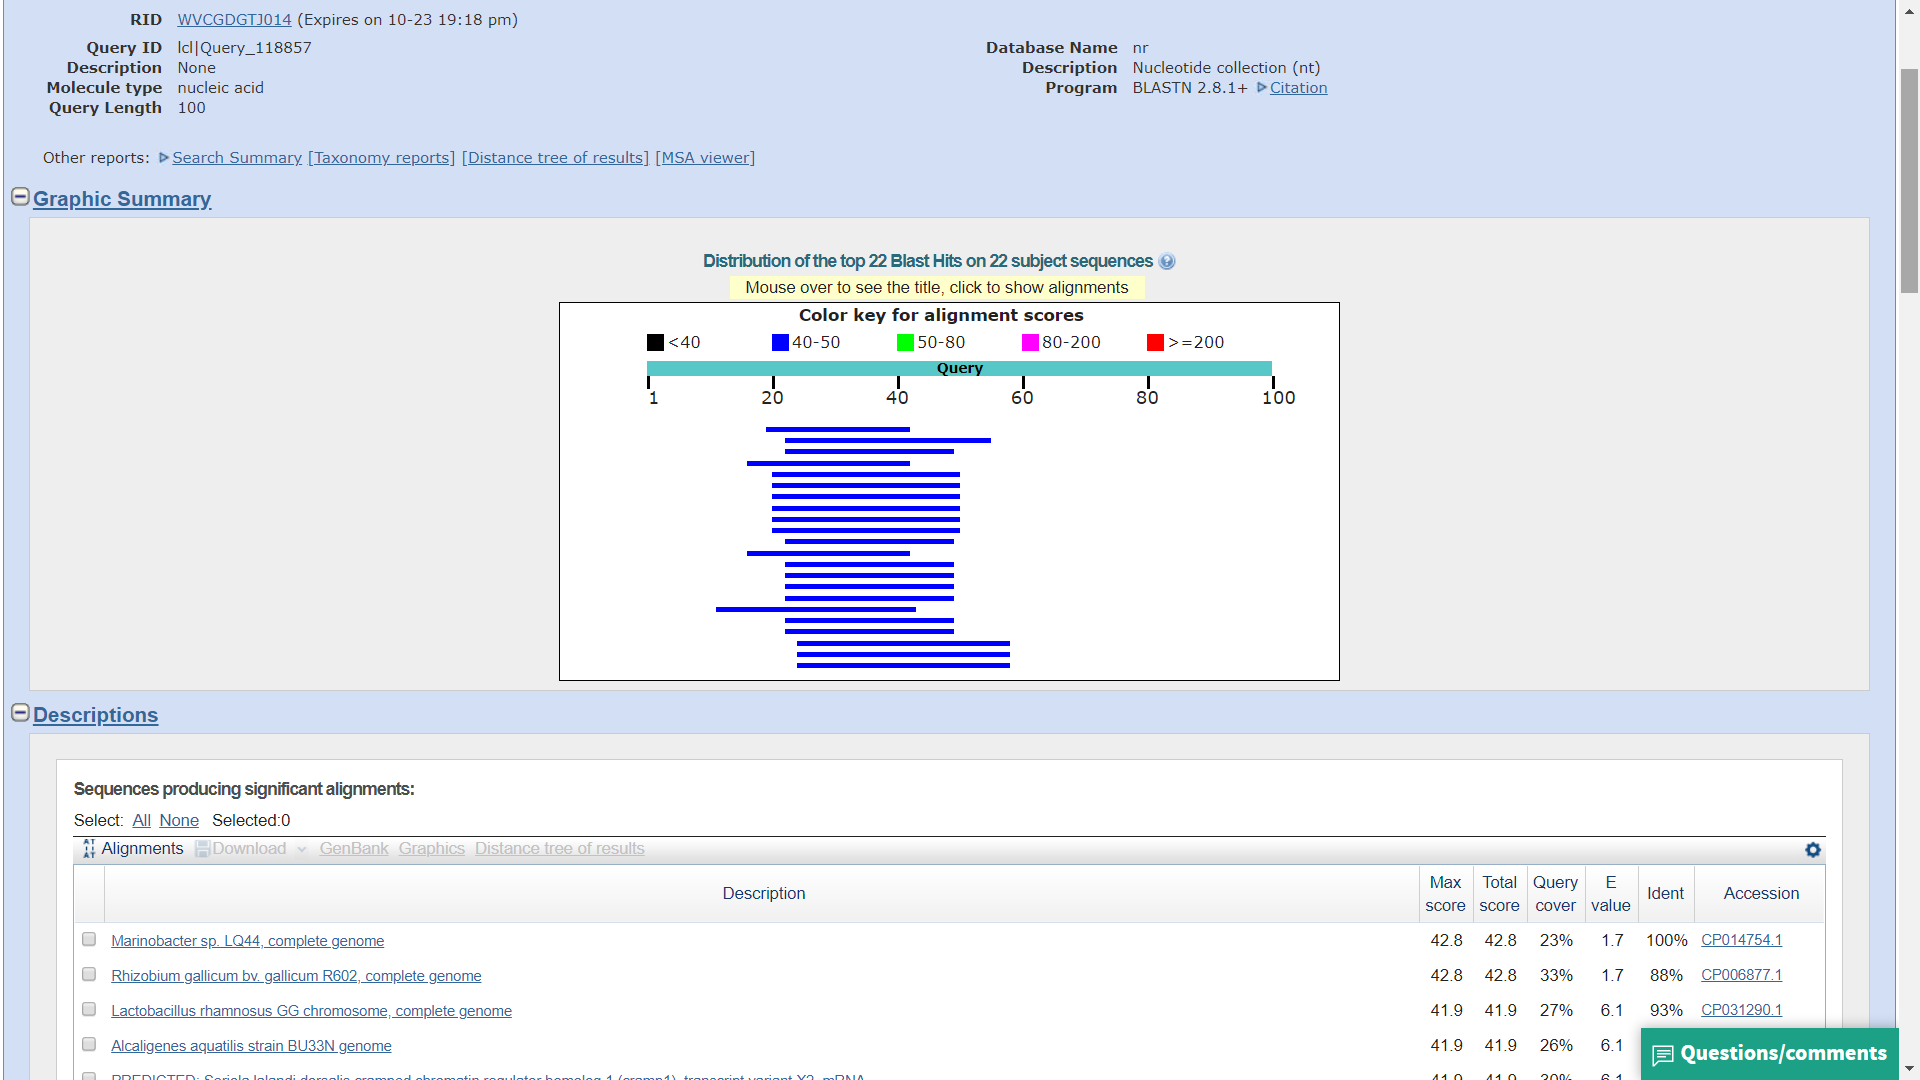



1000:
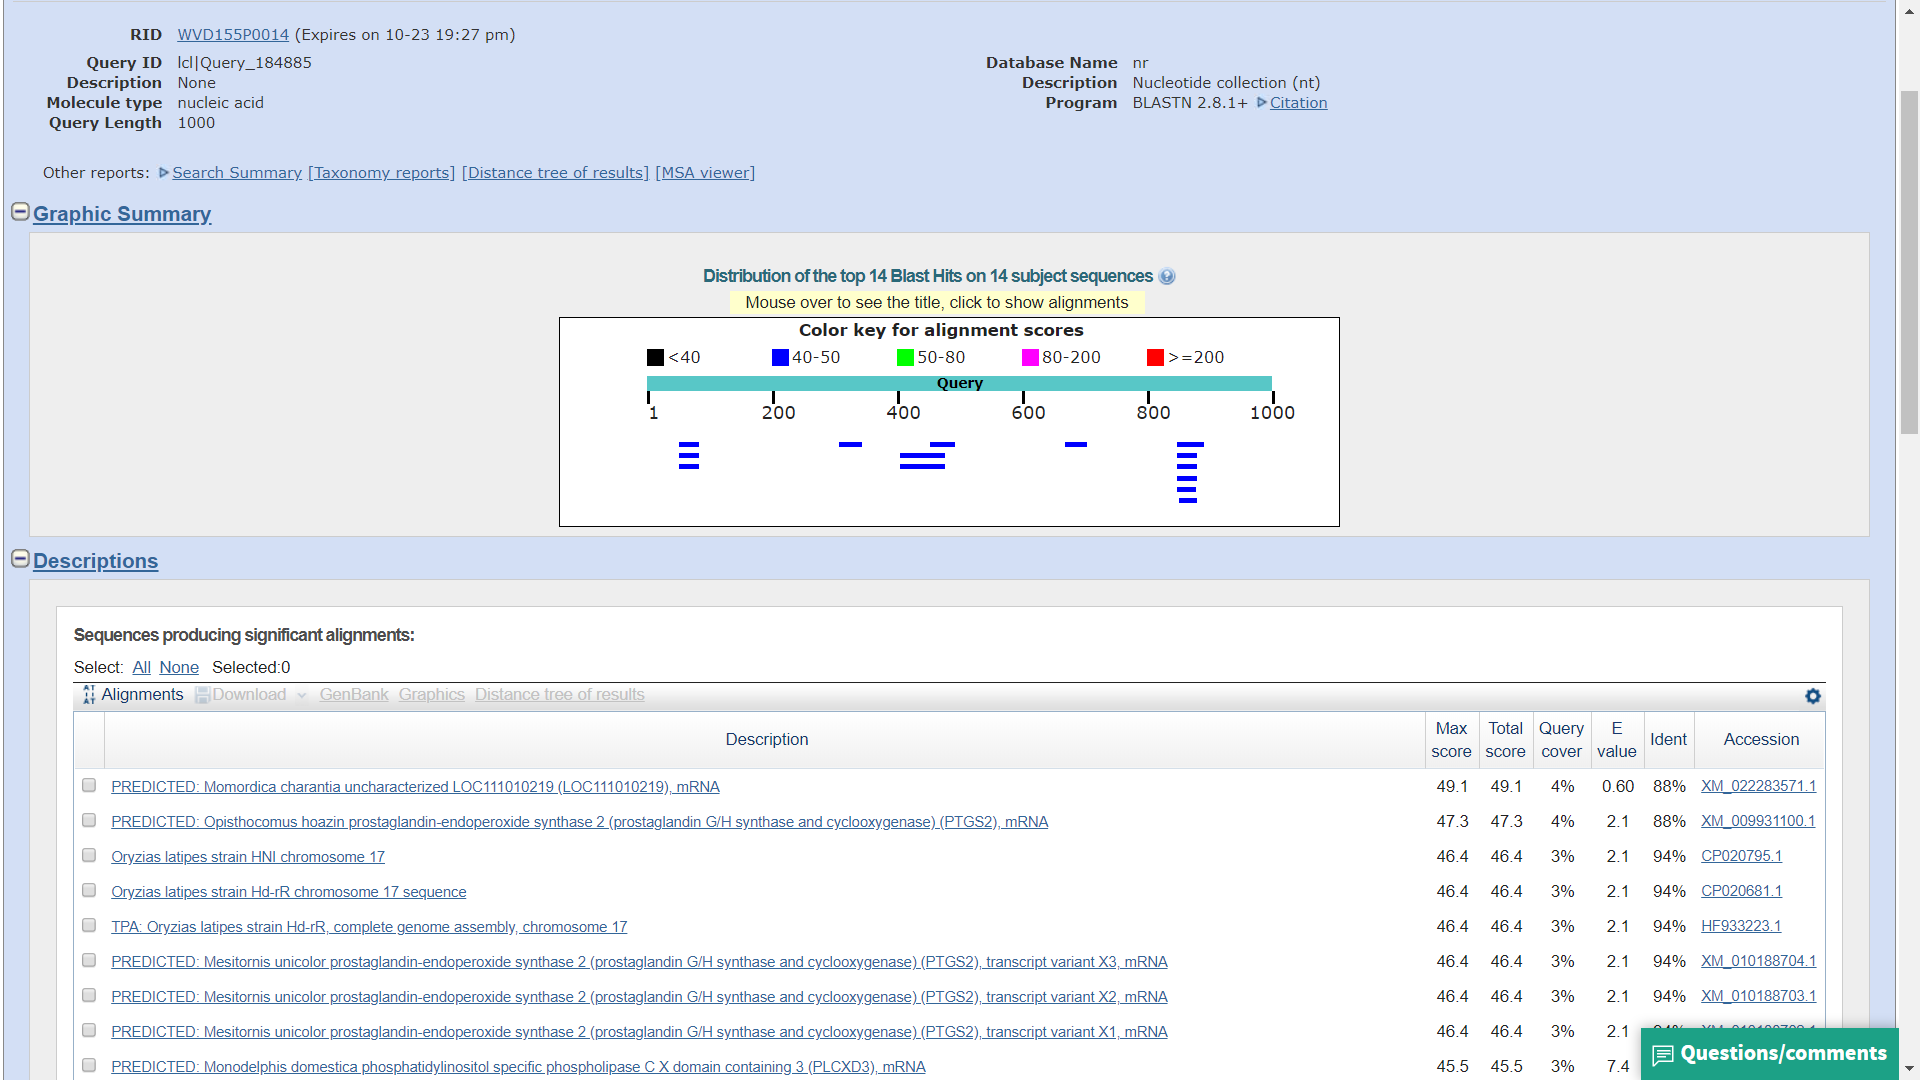



100000:
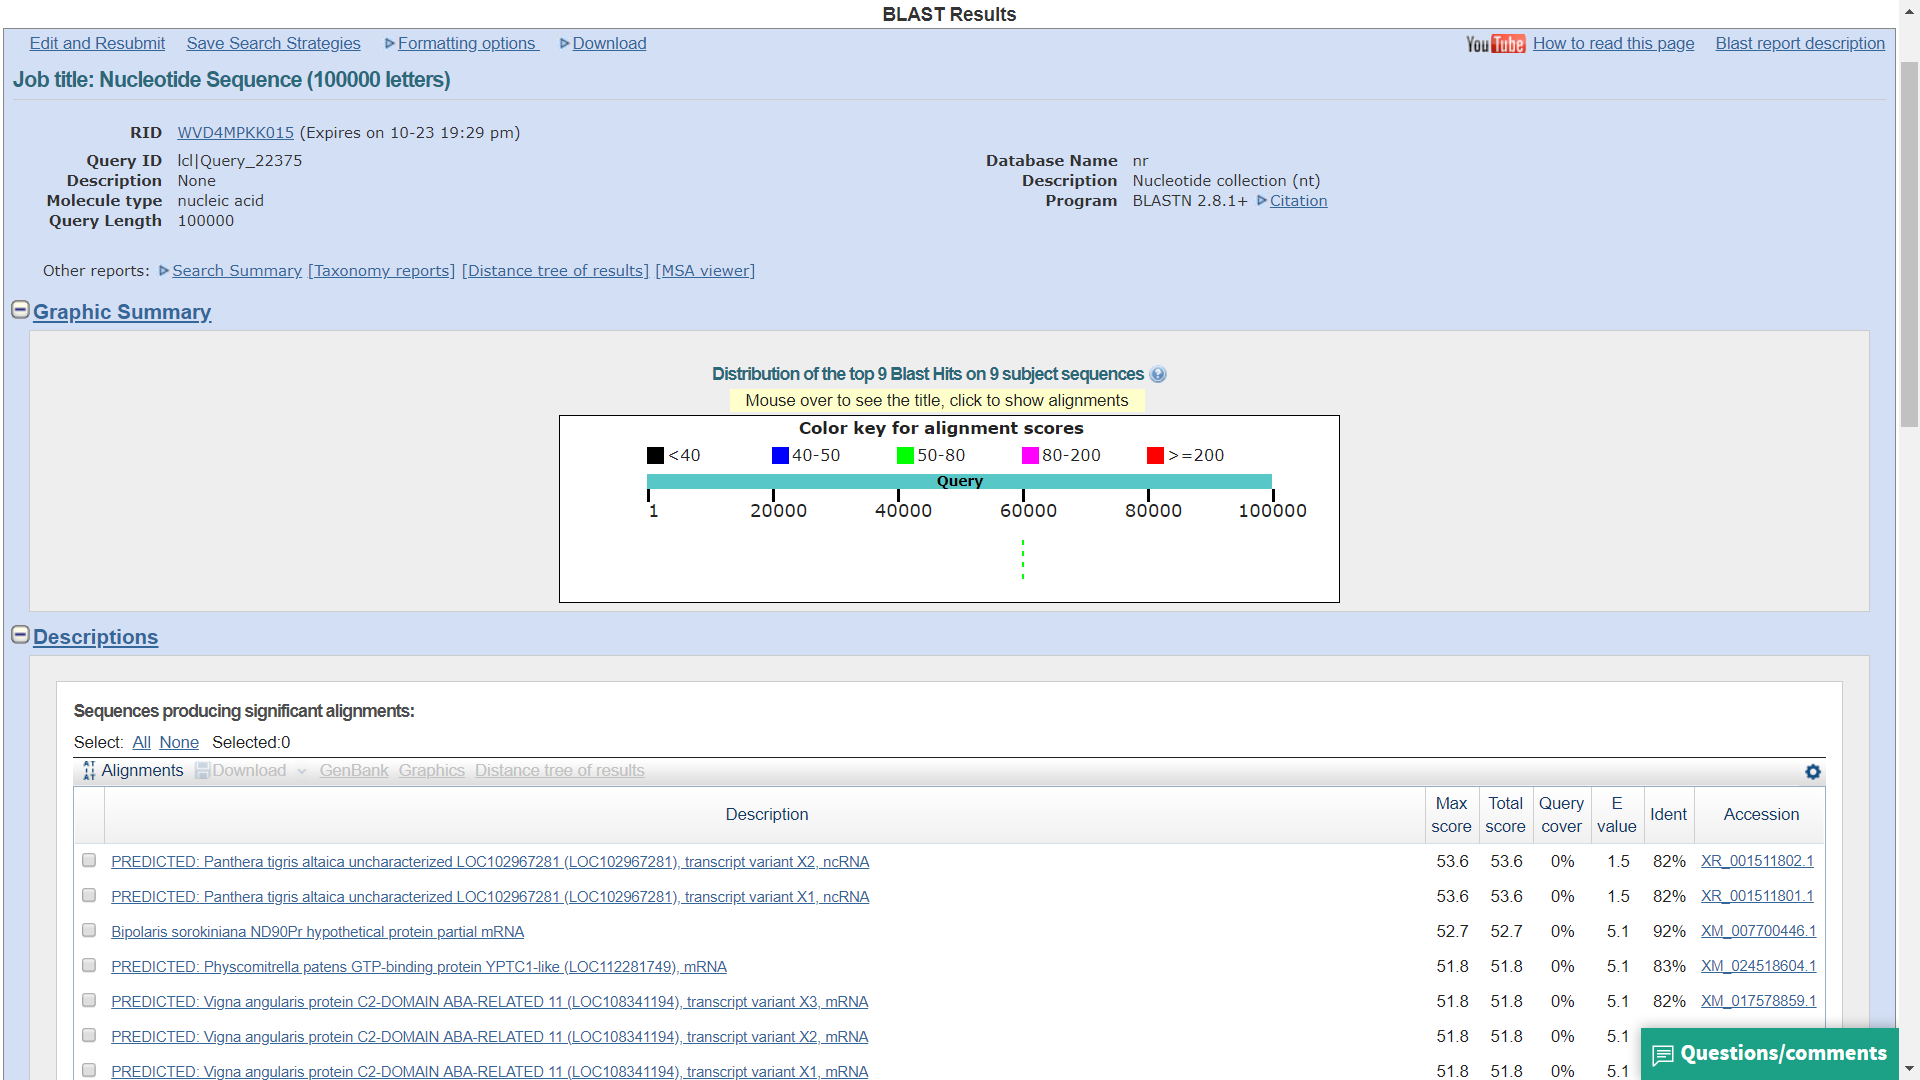